## Exercise 5. Sour cream

The file cream.txt contains data on an experiment to produce sour cream. Yogurt was placed in sweet cream, and yogurt bacteria were allowed to develop. Bacteria produce lactic acid, and as a surrogate for the number of yogurt bacteria, the acidity of the cream was measured. Interest was in the effect of the type of yogurt (denoted as starter) on acidity. The mixtures of yogurt and sweet cream were kept at constant temperature in a yogurt maker, in which five different positions could be used. The experiment was carried out with five batches of sweet cream, which were meant to have the same composition. With each batch each of five types of starter was used, with the yogurt placed in one of the five positions. The combinations of levels of three factors form a three-dimensional latin square. (You may need to install the R-package lme4, which is not included in the standard distribution of R.)

In [24]:
library("devtools"); install_github("lme4",user="lme4")

ERROR: Error in library("devtools"): there is no package called 'devtools'


ERROR: Error in install_github("lme4", user = "lme4"): could not find function "install_github"


In [2]:
cream = read.table("cream.txt", header=TRUE)
head(cream)

acidity,batch,position,starter
8.04,1,1,3
6.61,1,2,2
11.99,1,3,4
7.78,1,4,5
8.40,1,5,1
9.58,2,1,4


### 5a) Analyze the data in a three-way experiment without interactions with acidity as response and starter, batch and position as factors. By using summary command, can you tell whether there is a significant difference between the effects of starter 1 and starter 2 on acidity?

In [3]:
cream$batch = as.factor(cream$batch); cream$position = as.factor(cream$position); cream$starter = as.factor(cream$starter)

In [4]:
cream_aov=lm(acidity~batch+position+starter,data=cream); anova(cream_aov)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
batch,4,18.777504,4.6943760,8.597454,1.632238e-03
position,4,2.347944,0.5869860,1.075028,4.111910e-01
starter,4,44.135864,11.0339660,20.208013,2.904007e-05
Residuals,12,6.552232,0.5460193,NA,NA


In order to be able to use the results of this three-way ANOVA, the normality of the residuals has to be tested

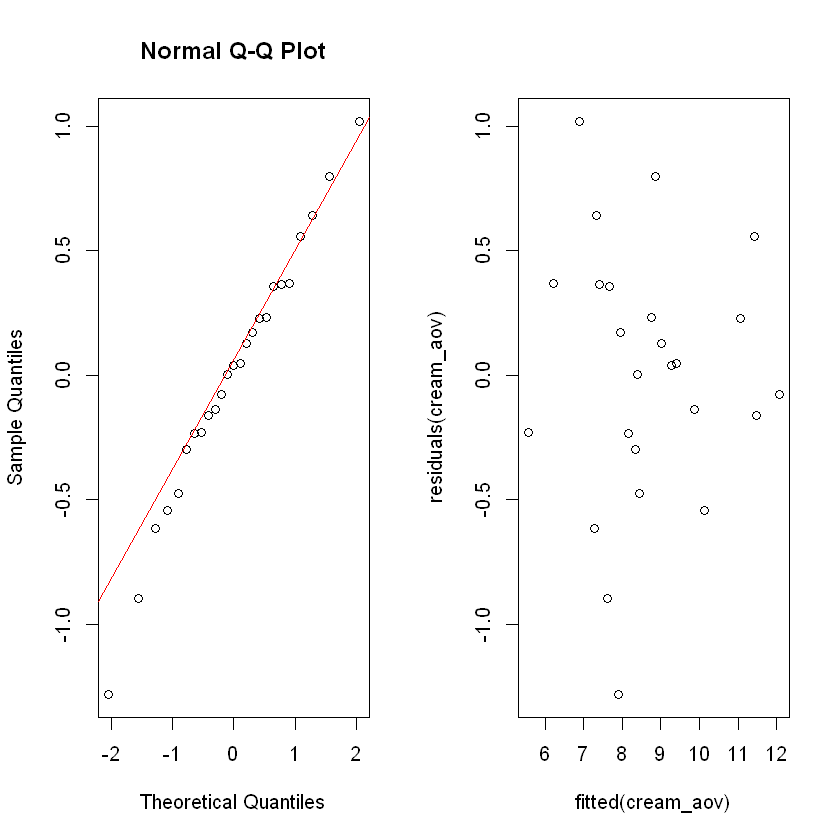

In [5]:
par(mfrow=c(1,2)); qqnorm(residuals(cream_aov)); qqline(residuals(cream_aov), col = 'red')
plot(fitted(cream_aov), residuals(cream_aov)); 

The left plot strongly implies normality while the right plot shows larger spread for fitted values in the middle with some extreme data points

In [6]:
summary(cream_aov)


Call:
lm(formula = acidity ~ batch + position + starter, data = cream)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2836 -0.2336  0.0384  0.3584  1.0204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.6616     0.5329  16.255 1.55e-09 ***
batch2       -1.3480     0.4673  -2.884   0.0137 *  
batch3        0.2760     0.4673   0.591   0.5658    
batch4        1.3680     0.4673   2.927   0.0127 *  
batch5        0.2000     0.4673   0.428   0.6763    
position2    -0.6180     0.4673  -1.322   0.2107    
position3    -0.0380     0.4673  -0.081   0.9365    
position4    -0.7640     0.4673  -1.635   0.1280    
position5    -0.2640     0.4673  -0.565   0.5825    
starter2     -0.1500     0.4673  -0.321   0.7538    
starter3     -0.9800     0.4673  -2.097   0.0579 .  
starter4      2.8100     0.4673   6.013 6.10e-05 ***
starter5     -0.4840     0.4673  -1.036   0.3208    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual 

Yes, the difference between starter 1 and starter 2 is estimated to be 0.15, this is larger than 0.05, meaning that there is a significant difference between the two.

### 5b) Recall that the main interest is in the effect of starter on the acidity; factors positions and batches represent the block variables. Remove insignificant block variable(s) if there are such, and perform an ANOVA for the resulting “fixed effects” model. Which starter(s) lead to significantly different acidity?

As we know from 5a), the variable position is not significant. Therefore we can perform ANOVA by dropping it

In [18]:
sig_cream = lm(acidity~starter+batch,data=cream); anova(sig_cream)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
starter,4,44.135864,11.033966,19.835951,4.816222e-06
batch,4,18.777504,4.694376,8.439161,7.348386e-04
Residuals,16,8.900176,0.556261,NA,NA


In [19]:
summary(sig_cream)


Call:
lm(formula = acidity ~ starter + batch, data = cream)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5648 -0.2548 -0.0548  0.3592  1.1352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.3248     0.4475  18.603 2.91e-12 ***
starter2     -0.1500     0.4717  -0.318   0.7546    
starter3     -0.9800     0.4717  -2.078   0.0542 .  
starter4      2.8100     0.4717   5.957 2.01e-05 ***
starter5     -0.4840     0.4717  -1.026   0.3201    
batch2       -1.3480     0.4717  -2.858   0.0114 *  
batch3        0.2760     0.4717   0.585   0.5666    
batch4        1.3680     0.4717   2.900   0.0104 *  
batch5        0.2000     0.4717   0.424   0.6772    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7458 on 16 degrees of freedom
Multiple R-squared:  0.8761,	Adjusted R-squared:  0.8141 
F-statistic: 14.14 on 8 and 16 DF,  p-value: 6.474e-06


When looking at the summary, it becomes clear that only starter 4 has a significant effect on the acidity, starter 3 is almost significant but not quite and the rest of the starters do not come close to having a significant impact.

### 5c) For the model from 5b), can we also apply the Friedman test to test whether there is an effect of starter on acidity? Motivate your answer.

### 5d) Repeat 5b) by performing a mixed effects analysis, modeling the block variable(s) (if there are any) as a random effect by using the function lmer. Compare your results to the results found by using the fixed effects model in 5b).

In [22]:
mixed_cream = lmer(acidity~starter+batch,data=cream)

ERROR: Error in lmer(acidity ~ starter + batch, data = cream): could not find function "lmer"
